# 너비 우선 탐색(BFS: Breath-First Search) 실습

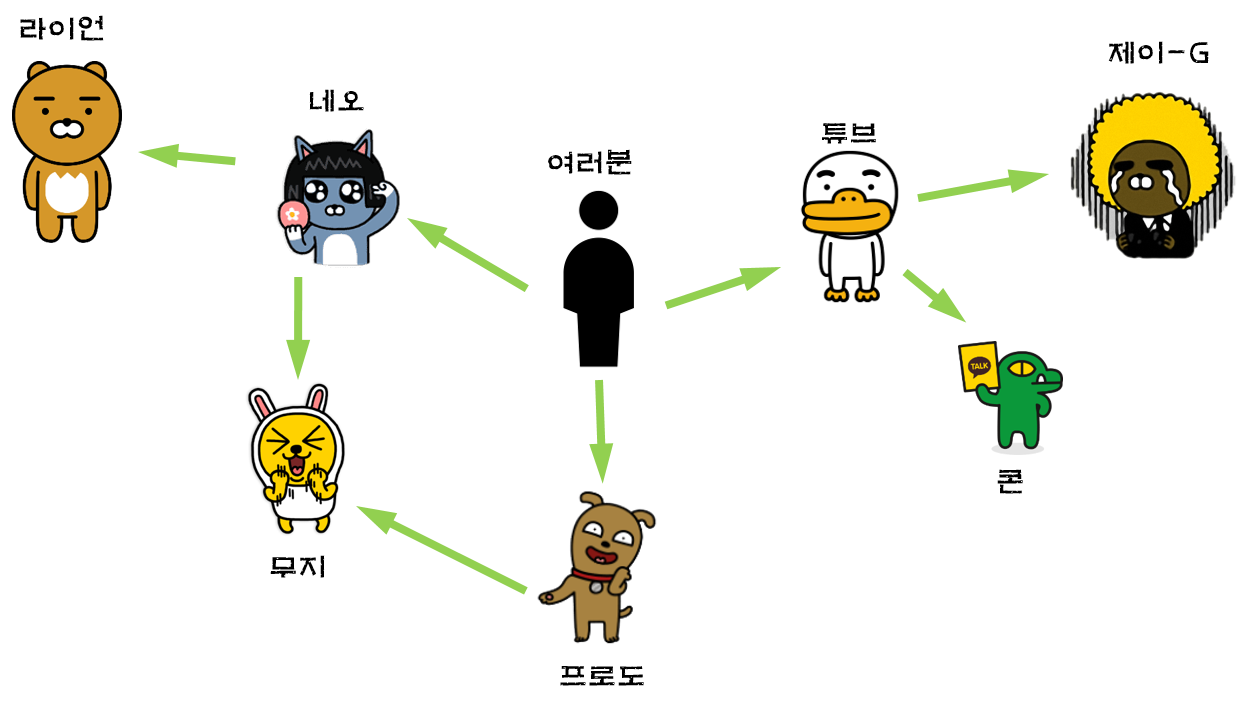

- 그래프 생성

In [1]:
graph = {}  # 해시 테이블(딕셔너리)를 이용하여 생성

In [2]:
graph["You"] = ["Frodo", "Neo", "Tube"] # 순서는 상관없어요. Value 의 순서도 상관없고요, Key를 입력하는 순서도 상관없다고...
graph["Neo"] = ["Ryan", "Muzi"]
graph["Frodo"] = ["Muzi"]
graph["Tube"] = ["Jay-G", "Con"]
graph["Ryan"] = []
graph["Muzi"] = []
graph["Jay-G"] = []
graph["Con"] = []

In [3]:
graph

{'Con': [],
 'Frodo': ['Muzi'],
 'Jay-G': [],
 'Muzi': [],
 'Neo': ['Ryan', 'Muzi'],
 'Ryan': [],
 'Tube': ['Jay-G', 'Con'],
 'You': ['Frodo', 'Neo', 'Tube']}

In [4]:
type(graph)

dict

- 큐 자료구조

https://docs.python.org/3.8/library/collections.html

In [5]:
from collections import deque

In [6]:
search_queue = deque()  # 새 큐를 생성 

In [7]:
search_queue += graph["You"] # 모든 이웃을 탐색 큐에 추가

In [8]:
search_queue

deque(['Frodo', 'Neo', 'Tube'])

In [9]:
type(search_queue)

collections.deque

- 너비우선탐색

In [10]:
def search(name):
    search_queue = deque()        # 새 큐를 생성
    search_queue += graph[name]    # name의 모든 이웃을 탐색 큐에 추가 
    
    while search_queue:  # 큐가 비어 있지 않는 한 계속 실행
        print(search_queue) # 큐를 확인하기 위해서 삽입
        person = search_queue.popleft()  # 큐의 첫 번째 사람을 꺼냄  

        if person_is_seller(person):  # person이 망고 판매상인지 확인
            print(person + "is a mango seller!") # 망고 판매상이 맞음
            return True
        else:
            search_queue += graph[person]  # 망고 판매상이 아님. 모든 이웃을 탐색 목록에 추가

    return False # 여기에 도달했다는 것은 망고 판매상이 아무도 없다는 의미

In [11]:
def person_is_seller(name):
    return name[-1] == 'm'

In [12]:
search("You")

deque(['Frodo', 'Neo', 'Tube'])
deque(['Neo', 'Tube', 'Muzi'])
deque(['Tube', 'Muzi', 'Ryan', 'Muzi'])
deque(['Muzi', 'Ryan', 'Muzi', 'Jay-G', 'Con'])
deque(['Ryan', 'Muzi', 'Jay-G', 'Con'])
deque(['Muzi', 'Jay-G', 'Con'])
deque(['Jay-G', 'Con'])
deque(['Con'])


False

- 우리의 예제 그래프는 사이클이 없기 때문에 무한반복에 빠지지 않지만, 코드를 수정해 줘야 함

In [13]:
from collections import deque

def search(name): # bfs 최종코드
    search_queue = deque()
    search_queue += graph[name]
    searched = [] # 이 배열은 이미 확인한 사람을 추적하기 위한 것    searched = []
    while search_queue:   # [, 'Tube', 'Muzi']
        person = search_queue.popleft()   # person = 'Neo'
        if not person in searched: # 이전에 확인하지 않는 사람만 확인  'Neo'  in ['Frodo] 
            if person_is_seller(person):
                print(person + " is a mango seller!")
                return True
            else:
                search_queue += graph[person]  # ['Tube', 'Muzi', 'Ryan', 'Muzi']
                searched.append(person)  # 확인한 사람은 추가  ['Frodo','Neo']
    return False




In [20]:
search("You")

False

In [19]:
def person_is_seller(name):
    return name[-1] == 'm'

In [16]:
name = 'Muzi'
name[-1] == 'i' 

True

In [ ]:
search("You")

False

<hr>

- 다음 그래프에서 너비 우선 탐색을 사용해서 최단 경로를 찾아 보자.

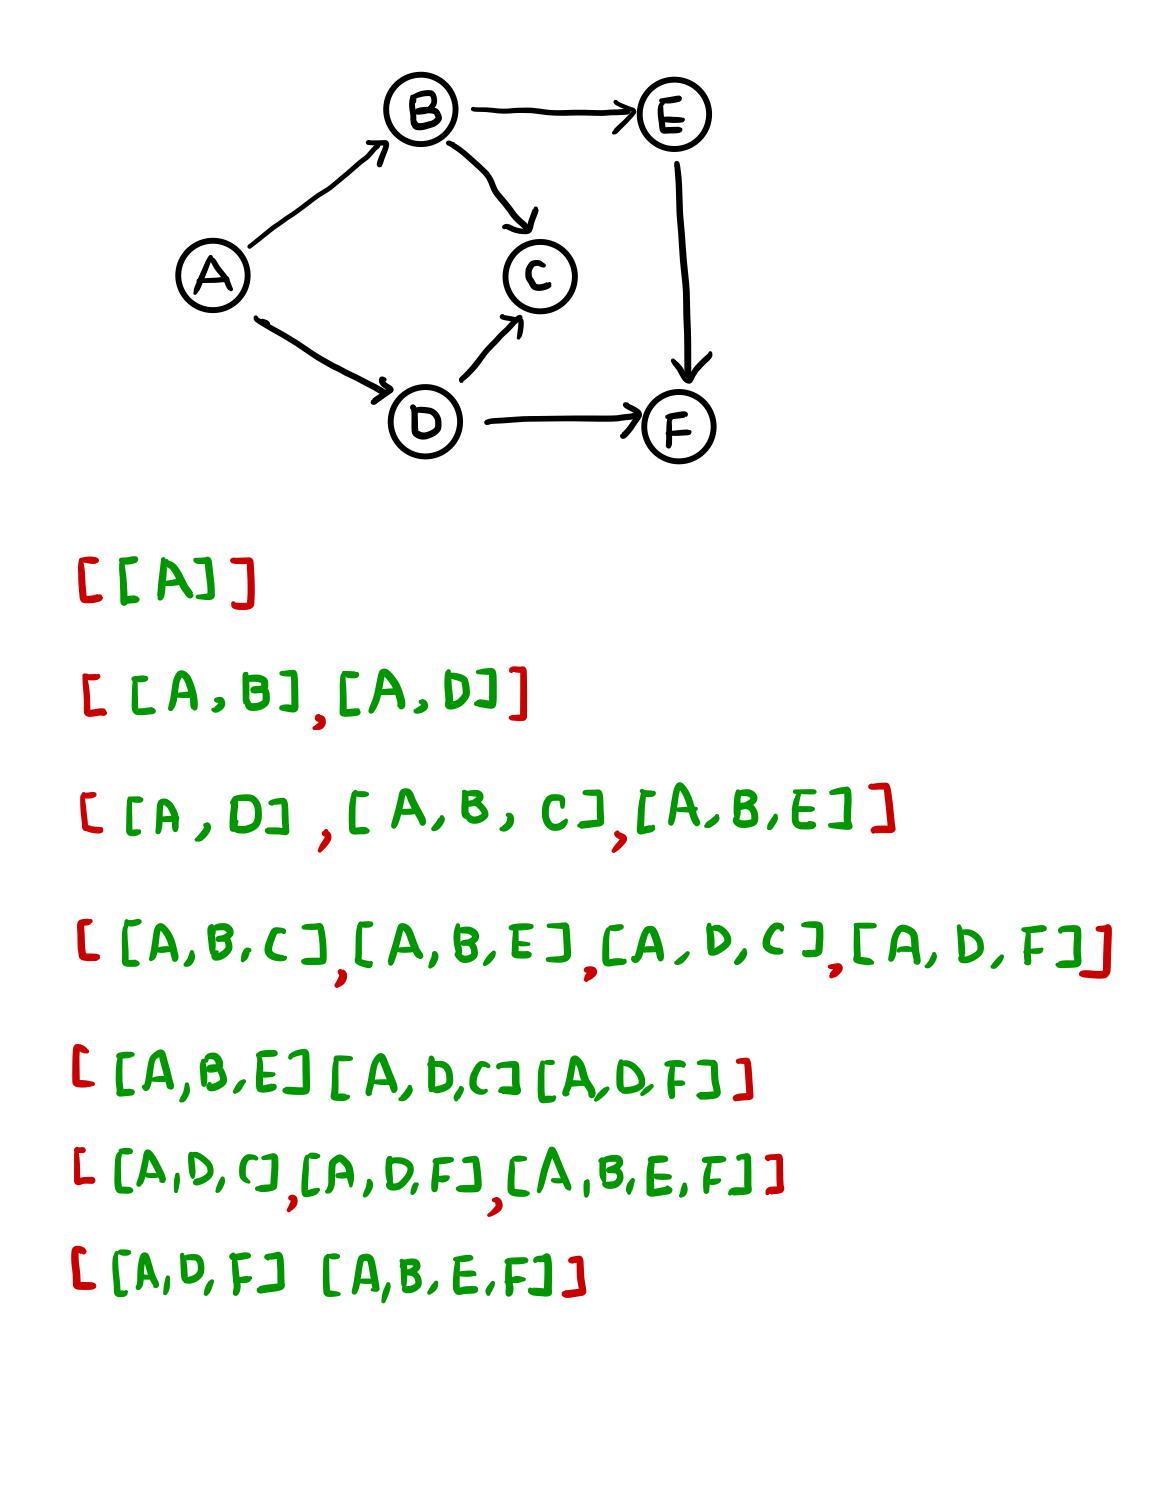

In [21]:
graph = {}

In [22]:
graph["A"] = ["B","D"]
graph["B"] = ["C","E"]
graph["C"] = []
graph["D"] = ["C","F"]
graph["E"] = ["F"]
graph["F"] = []



In [23]:
graph["C"]

[]

In [24]:
print(graph.get("C")) # [] 도 None 이 아닌 결과값

[]


In [25]:
from collections import deque

In [ ]:
# 입력값으로는 (그래프, 시작점, 도착점)
def bfs(graph,start,end): # Breath First Search (BFS) 너비우선탐색
    # A 부터 F 까지 이어지는 경로, start = 'A', end = 'F'
    search_queue = deque()   # [] 
    search_queue.append([start])  # ['A'] 
    
    while search_queue:     # [,['A','D'] ]
        
        path = search_queue.popleft()  # path = ['A','D','F']
        node = path[-1]  # node = 'F'
         
        if node == end:  # 'F' == 'F'
            return path #  ['A','D','F]
        
        
        for adjacent in graph.get(node,[]):   # ["C","E"] adjacent='C'

            new_path = path[:] # new_path = ['A','B',C]
            new_path.append(adjacent) # new_path = ['A','B',C]
            search_queue.append(new_path) # [['A','D'] ['A','B',C]]
        
    return "no path" 

- "A"에서 "F"로 가는 경로

In [ ]:
bfs(graph,"A","F")

['A', 'D', 'F']

In [ ]:
len(bfs(graph,"A","F"))

3

In [ ]:
bfs(graph,"A","E")

['A', 'B', 'E']

In [ ]:
bfs(graph,"A","C")

['A', 'B', 'C']

In [ ]:
bfs(graph,"B","F")

['B', 'E', 'F']

In [ ]:
bfs(graph,"D","E")

'no path'

--- 
- 아래는 `bfs` 함수의 좀 더 디테일한 설명

In [ ]:
def bfs_with_log(graph, start, end):
    # 경로를 추적하기 위한 큐를 생성m
    queue = []
    # 첫번째 노드(패스)를 큐에 추가
    queue.append([start])
    print("initial Q: ", queue ) # 반복문 전에 큐를 테스트 

    while queue:
        print("-"*30)
        print("Q:", queue)
        # 큐에서 첫번째 값(패스)을 가져오기
        path = queue.pop(0)
        print("path: ", path)

        # 경로로부터 마지막 노드를 가져오기
        node = path[-1]
        print("node: ", path)
        
        # 만약 경로를 찾았으면 경로를 리턴
        if node == end:
            return path

        # 그렇지 않으면 마지막 노드와 연결된 인접 노드를 경로에 업데이트    
        # 마지막 노드와 인접한 모든 노드들을 큐에 경로로 업데이트 하여 추가 
        for adjacent in graph.get(node, []):
            print(graph.get(node, []), adjacent)
            new_path = list(path)
            new_path.append(adjacent)
            print(f'새로운 패스: {new_path}')
            #print("새로운 패스" + new_path )
            queue.append(new_path)
            print(f'업데이트 된 큐: {queue}')



In [ ]:
bfs_with_log(graph,"A","F")

initial Q:  [['A']]
------------------------------
Q: [['A']]
path:  ['A']
node:  ['A']
['B', 'D'] B
새로운 패스: ['A', 'B']
업데이트 된 큐: [['A', 'B']]
['B', 'D'] D
새로운 패스: ['A', 'D']
업데이트 된 큐: [['A', 'B'], ['A', 'D']]
------------------------------
Q: [['A', 'B'], ['A', 'D']]
path:  ['A', 'B']
node:  ['A', 'B']
['C', 'E'] C
새로운 패스: ['A', 'B', 'C']
업데이트 된 큐: [['A', 'D'], ['A', 'B', 'C']]
['C', 'E'] E
새로운 패스: ['A', 'B', 'E']
업데이트 된 큐: [['A', 'D'], ['A', 'B', 'C'], ['A', 'B', 'E']]
------------------------------
Q: [['A', 'D'], ['A', 'B', 'C'], ['A', 'B', 'E']]
path:  ['A', 'D']
node:  ['A', 'D']
['C', 'F'] C
새로운 패스: ['A', 'D', 'C']
업데이트 된 큐: [['A', 'B', 'C'], ['A', 'B', 'E'], ['A', 'D', 'C']]
['C', 'F'] F
새로운 패스: ['A', 'D', 'F']
업데이트 된 큐: [['A', 'B', 'C'], ['A', 'B', 'E'], ['A', 'D', 'C'], ['A', 'D', 'F']]
------------------------------
Q: [['A', 'B', 'C'], ['A', 'B', 'E'], ['A', 'D', 'C'], ['A', 'D', 'F']]
path:  ['A', 'B', 'C']
node:  ['A', 'B', 'C']
------------------------------
Q: [['A', 'B

['A', 'D', 'F']